# Mini Project 5-2 Explore Probability Distributions

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Import relevant libraries, packages, and modules. For this Project, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [1]:
# Import relevant libraries, packages, and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

data=pd.read_csv('modified_c4_epa_air_quality.csv')

data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [4]:
# Display first 10 rows of the data.

data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [5]:
# Display number of rows, number of columns.
data.shape

(260, 8)

Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

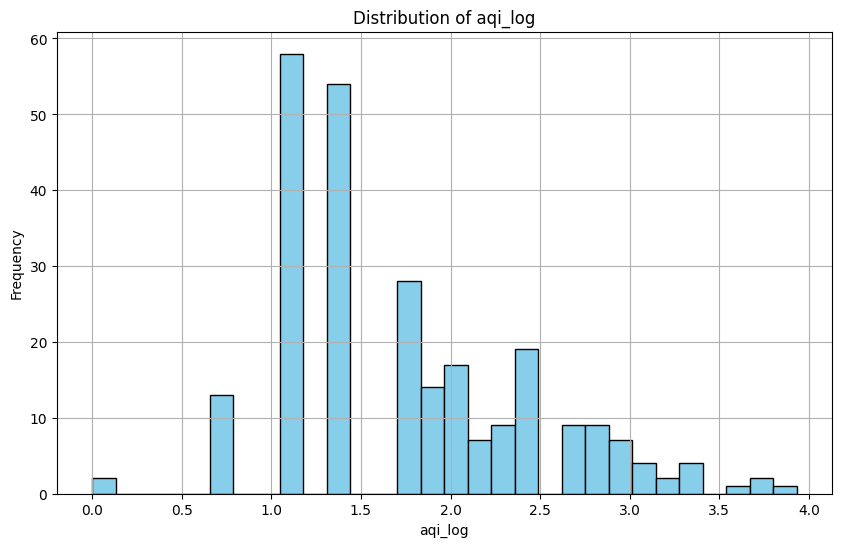

In [6]:
# Create a histogram to visualize distribution of aqi_log.

plt.figure(figsize=(10, 6))
plt.hist(data['aqi_log'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of aqi_log')
plt.xlabel('aqi_log')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Question:** What do you observe about the shape of the distribution from the histogram? 

A: There is a consitent number of values after 1.7 but there are values to the left which are more spread out but also have a higher frequency

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


 As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [7]:
# Define variable for aqi_log mean.
mean_aqi_log = data['aqi_log'].mean()

# Print out the mean.
print("Mean of aqi_log:", mean_aqi_log)

Mean of aqi_log: 1.7669210929985577


In [8]:
# Define variable for aqi_log standard deviation.
std_aqi_log = data['aqi_log'].std()

# Print out the standard deviation.
print("Standard deviation of aqi_log:", std_aqi_log)

Standard deviation of aqi_log: 0.7147155520223721


Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [10]:
# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit = mean_aqi_log - std_aqi_log

# Define variable for upper limit, 1 standard deviation above the mean.
upper_limit = mean_aqi_log + std_aqi_log

# Display lower_limit, upper_limit.
print("Lower limit :", lower_limit)
print("Upper limit :", upper_limit)

Lower limit : 1.0522055409761855
Upper limit : 2.48163664502093


In [11]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
# Find the values within 1 standard deviation of the mean
within_one_std = data[(data['aqi_log'] >= lower_limit) & (data['aqi_log'] <= upper_limit)]

# Calculate the percentage of data within 1 standard deviation
percentage = len(within_one_std) / len(data) * 100

# Print the result
print(f"Percentage of data within 1 standard deviation: {percentage:.2f}%")

Percentage of data within 1 standard deviation: 76.15%


Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [12]:
# Define variable for lower limit, 2 standard deviation below the mean.
lower_limit_2std = mean_aqi_log - 2 * std_aqi_log

# Define variable for upper limit, 2 standard deviation above the mean.
upper_limit_2std = mean_aqi_log + 2 * std_aqi_log

# Display lower_limit, upper_limit.
print("Lower limit (2stds) :", lower_limit_2std)
print("Upper limit (2stds):", upper_limit_2std)

Lower limit (2stds) : 0.33748998895381344
Upper limit (2stds): 3.1963521970433018


In [17]:
# Display the actual percentage of data that falls within 2 standard deviation of the mean.
# Find the values within 2 standard deviation of the mean
within_two_std = data[(data['aqi_log'] >= lower_limit_2std) & (data['aqi_log'] <= upper_limit_2std)]

# Calculate the percentage of data within 2 standard deviation
percentage2 = len(within_two_std) / len(data) * 100

# Print the result
print(f"Percentage of data within 2 standard deviation: {percentage2:.2f}%")

Percentage of data within 2 standard deviation: 95.77%


Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [14]:
# Define variable for lower limit, 3 standard deviation below the mean.
lower_limit_3std = mean_aqi_log - 3 * std_aqi_log

# Define variable for upper limit, 3 standard deviation above the mean.
upper_limit_3std = mean_aqi_log + 3 * std_aqi_log

# Display lower_limit, upper_limit.
print("Lower limit (3stds) :", lower_limit_3std)
print("Upper limit (3stds):", upper_limit_3std)

Lower limit (3stds) : -0.3772255630685586
Upper limit (3stds): 3.911067749065674


In [18]:
# Find the values within 3 standard deviations of the mean
within_three_std = data[(data['aqi_log'] >= lower_limit_3std) & (data['aqi_log'] <= upper_limit_3std)]

# Calculate the percentage of data within 3 standard deviations
percentage3 = len(within_three_std) / len(data) * 100

# Print the result
print(f"Percentage of data within 3 standard deviations: {percentage3:.2f}%")

Percentage of data within 3 standard deviations: 99.62%


## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 

A: I got 76% for 1 standard deviation. This is more than 68% which is 1 standard deviation. This means it is not perfectly normally distributed. For 2 standard deviations it is 95.77% which is slightly higher than 95% which means it is not perfecrly distributed. For the third standard deviation it is 99.6% which is slightly less than 99.7%

**Question:** How would you use z-score to find outliers? 

A: I would first calculate the z score. Then determine a threshold for the outliers. Then flag points that are outside the z score

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [20]:
# Now, we compute the z-score for each value in aqi_log
data['z_score'] = (data['aqi_log'] - mean_aqi_log) / std_aqi_log

# Display the first 5 rows to ensure that the new column was added
print(data.head())

   date_local    state_name   county_name      city_name  \
0  2018-01-01       Arizona      Maricopa        Buckeye   
1  2018-01-01          Ohio       Belmont      Shadyside   
2  2018-01-01       Wyoming         Teton  Not in a city   
3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure   aqi_log   z_score  
0  Parts per million  2.079442  0.437265  
1  Parts per million  1.791759  0.034753  
2  Parts per million  1.098612 -0.935070  
3  Parts per million  1.3862

Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [21]:
# Filter data where aqi_log is above or below 3 standard deviations
outliers = data[(data['aqi_log'] < lower_limit_3std) | (data['aqi_log'] > upper_limit_3std)]

# Display the outliers
print(outliers)

     date_local state_name county_name city_name local_site_name  \
244  2018-01-01    Arizona    Maricopa   Phoenix    WEST PHOENIX   

      parameter_name   units_of_measure   aqi_log   z_score  
244  Carbon monoxide  Parts per million  3.931826  3.029044  


**Question:** What do you observe about potential outliers based on the calculations?


A: The z score is greater than 3 and hence is an outlier

**Question:** Why is outlier detection an important part of this project? 

A: Outliers can skew the conclusions drawn as they are not representative of the entire data set. Hence they must be removed

## **Considerations**

**What are some key takeaways that you learned during this lab?**

A: The importantance of outlier and outlier elimination as well as how to identify an outlier

**What summary would you provide to audiences? Consider the distribution of the data and which sites would benefit from additional research.**

A: Firstly that the data is not perfectly normally distributed. Then that there are outliers. This West Phoenix site in Arizona is interesting to look at as it is an outlier. This could be a site of further research or more sites that exist close to a -3 or 3 z score.

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 